In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

## Load the Task Data

Load the `data/task_data.csv` dataset (data description in task_data_description.txt).

In [4]:
!ls data/

task_data.csv             task_data_description.txt


In [5]:
!cat data/task_data_description.txt

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [6]:
!head data/task_data.csv

Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PCo

In [7]:
df = pd.read_csv('data/task_data.csv', index_col='Id')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

In [8]:
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig    ...     PoolArea PoolQC Fence  \
Id                                    ...                             
1          Lvl    AllPub    Inside    ...            0    NaN   NaN   
2          Lvl    AllPub       FR2    ...            0    NaN   NaN   
3          Lvl    AllPub    Inside    ...            0    NaN   NaN   
4          Lvl    AllPub    Corner    ...            0    NaN   NaN   
5          Lvl    AllPub       FR2    ...            0    NaN   NaN   

   MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
Id                                                                         
1          NaN       0      2    2008        WD         Normal     208500  
2          NaN       0      5    2007        WD         Normal     181500  
3          NaN       0      9    2008        WD         Normal     223500  
4          NaN       0      2    2006        WD        Abnorml     140000  
5          NaN       0     12    2008        WD         Normal     250000  

[5 rows x 80 columns]

## Data Types and Measurement Scales

Select at least 2 features with nominal scale, 1 with dichotomous scale, 2 with ordinal scale, 2 with discrete numeric scale, and 2 with numeric continuous scale.

### Nominal Scale

1. Neighborhood: Physical locations within Ames city limits
    - Blmngtn Bloomington Heights
    - Blueste Bluestem
    - BrDale Briardale
    - BrkSide Brookside
    - ClearCr Clear Creek
    - CollgCr College Creek
    - Crawfor Crawford
    - Edwards Edwards
    - Gilbert Gilbert
    - IDOTRR Iowa DOT and Rail Road
    - MeadowV Meadow Village
    - Mitchel Mitchell
    - Names North Ames
    - NoRidge Northridge
    - NPkVill Northpark Villa
    - NridgHt Northridge Heights
    - NWAmes Northwest Ames
    - OldTown Old Town
    - SWISU South & West of Iowa State University
    - Sawyer Sawyer
    - SawyerW Sawyer West
    - Somerst Somerset
    - StoneBr Stone Brook
    - Timber Timberland
    - Veenker Veenker
2. MSZoning: Identifies the general zoning classification of the sale.
    - A Agriculture
    - C Commercial
    - FV Floating Village Residential
    - I Industrial
    - RH Residential High Density
    - RL Residential Low Density
    - RP Residential Low Density Park
    - RM Residential Medium Density

### Dichotomous Scale

1. CentralAir: Central air conditioning
    - N No
    - Y Yes

### Ordinal Scale

1. LotShape: General shape of property
    - Reg Regular
    - IR1 Slightly irregular
    - IR2 Moderately Irregular
    - IR3 Irregular
2. Utilities: Type of utilities available
    - AllPub All public Utilities (E,G,W,& S)	
    - NoSewr Electricity, Gas, and Water (Septic Tank)
    - NoSeWa Electricity and Gas Only
    - ELO Electricity only

### Discrete Numeric Scale

1. Fireplaces: Number of fireplaces
2. YearBuilt: Original construction date

### Numeric Continuous Scale

1. LotFrontage: Linear feet of street connected to property
2. LotArea: Lot size in square feet

## Domains Validation

Validate domains of all features selected in previous step.

In [9]:
features = ['Neighborhood', 'MSZoning', 'CentralAir', 'LotShape', 'Utilities', 'Fireplaces',
            'YearBuilt', 'LotFrontage', 'LotArea']

In [10]:
for feature in ['Neighborhood', 'MSZoning', 'CentralAir', 'LotShape', 'Utilities', 'Fireplaces']:
    print(feature, df[feature].unique())

Neighborhood ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
MSZoning ['RL' 'RM' 'C (all)' 'FV' 'RH']
CentralAir ['Y' 'N']
LotShape ['Reg' 'IR1' 'IR2' 'IR3']
Utilities ['AllPub' 'NoSeWa']
Fireplaces [0 1 2 3]


All values follow the data description file.
There are only minor but consistent differences.
For example 'C' in data description is 'C (all)' in data.
Also some cases differ e.g. 'NAmes' vs. 'Names'.

In [11]:
for feature in ['YearBuilt', 'LotFrontage', 'LotArea']:
    print(df[feature].describe(), '\n')

count    1460.000000
mean     1971.267808
std        30.202904
min      1872.000000
25%      1954.000000
50%      1973.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64 

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64 

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64 



Numerical values are also in valid domains.

## Format Conversion

Convert them to proper format.

In [12]:
df['Neighborhood'] = df['Neighborhood'].astype('category')
df['MSZoning'] = df['MSZoning'].astype('category')
df['CentralAir'] = df['CentralAir'].astype('category')
df['LotShape'] = df['LotShape'].astype('category', ordered=True, categories=['Reg', 'IR1', 'IR2', 'IR3'])
df['Utilities'] = df['Utilities'].astype('category', ordered=True, categories=['AllPub', 'NoSewr', 'NoSeWa', 'ELO'])
df['LotArea'] = df['LotArea'].astype('float64')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  """


In [13]:
df[features].dtypes

Neighborhood    category
MSZoning        category
CentralAir      category
LotShape        category
Utilities       category
Fireplaces         int64
YearBuilt          int64
LotFrontage      float64
LotArea          float64
dtype: object

## Outliers Detection

Try to detect some outliers (use GrLivArea and SalePrice).

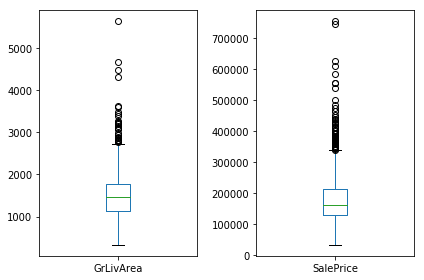

In [14]:
fig, (ax1, ax2) = plt.subplots(ncols=2)
df['GrLivArea'].plot.box(ax=ax1)
df['SalePrice'].plot.box(ax=ax2)
fig.tight_layout()

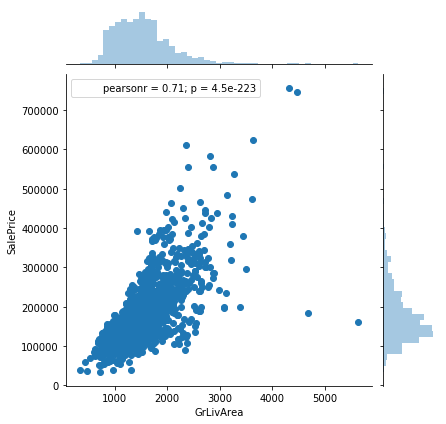

In [15]:
sns.jointplot(x='GrLivArea', y='SalePrice', data=df)

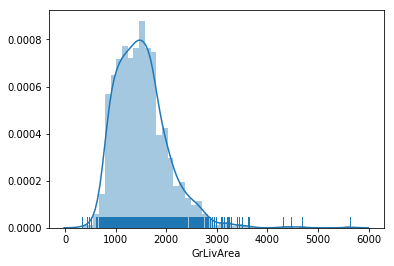

In [16]:
sns.distplot(df['GrLivArea'], rug=True)

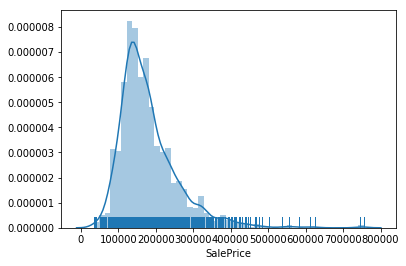

In [17]:
sns.distplot(df['SalePrice'], rug=True)

In [18]:
df[df['SalePrice'] > 700000]

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                      
692           60       RL        104.0  21535.0   Pave   NaN      IR1   
1183          60       RL        160.0  15623.0   Pave   NaN      IR1   

     LandContour Utilities LotConfig    ...     PoolArea PoolQC  Fence  \
Id                                      ...                              
692          Lvl    AllPub    Corner    ...            0    NaN    NaN   
1183         Lvl    AllPub    Corner    ...          555     Ex  MnPrv   

     MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
Id                                                                           
692          NaN       0      1    2007        WD         Normal     755000  
1183         NaN       0      7    2007        WD        Abnorml     745000  

[2 rows x 80 columns]

I detected the four samples below as outliers. Because they have much higher GrLivArea
(Above grade (ground) living area square feet).
Two of them are abnormally expesive and the other two were sold when not fully completed.

On the other hand. The two with high sale price follow the trend which shows the scatter plot.
Correlation between GrLivArea and SalePrice is 0.71 (shown in the scatter plot).
And if the two other were sold when completed they might be expensive.

In [19]:
with pd.option_context('display.max_columns', None):
    print(df[df['GrLivArea'] > 4000])

      MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                      
524           60       RL        130.0  40094.0   Pave   NaN      IR1   
692           60       RL        104.0  21535.0   Pave   NaN      IR1   
1183          60       RL        160.0  15623.0   Pave   NaN      IR1   
1299          60       RL        313.0  63887.0   Pave   NaN      IR3   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
Id                                                                       
524          Bnk    AllPub    Inside       Gtl      Edwards       PosN   
692          Lvl    AllPub    Corner       Gtl      NoRidge       Norm   
1183         Lvl    AllPub    Corner       Gtl      NoRidge       Norm   
1299         Bnk    AllPub    Corner       Gtl      Edwards      Feedr   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
Id                                      

## Missing Data

Determine all features with missing data.
Find a feature that should be completely droped from further analysis.
Select a feature with reasonable small portion of missing values (but with at least 5) and try to fill it properly.

In [20]:
# features with missing data
fearutres_with_nan = df.columns[df.isnull().any()].tolist()
print('Number of samples:', df.shape[0])
df[fearutres_with_nan].isnull().sum().sort_values(ascending=False)

Number of samples: 1460


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

### Dropped Feature

Feature that should be completely droped from further analysis: LotFrontage (Linear feet of street connected to property)

It might seem that PoolQC, MiscFeature, Alley, Fence, FireplaceQu features have more missing values but in these cases missing values ussualy mean that the feature is not available (e.g. Fence is not available).

In [21]:
del df['LotFrontage']

### Filling `MasVnrType` Feature

In [22]:
df['MasVnrType'].value_counts(normalize=True).mul(100)

None       59.504132
BrkFace    30.647383
Stone       8.815427
BrkCmn      1.033058
Name: MasVnrType, dtype: float64

As almost 60% of MasVnrType is of value None it's reasonable to claim that the missing values might be set to None. Then MasVnrArea might be also set to 0.

In [23]:
df.loc[df['MasVnrType'].isnull(), ['MasVnrType', 'MasVnrArea']] = ('None', 0)
df[['MasVnrType', 'MasVnrArea']].isnull().sum()

MasVnrType    0
MasVnrArea    0
dtype: int64